In [121]:
%load_ext autoreload
%autoreload 2



     


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#pip install python-dotenv ipython loguru typer mlflow nannyml boto3

In [123]:
import sys
import os


sys.path.append(os.path.abspath(".."))

from ARISA_DSML.preproc import get_raw_data
from ARISA_DSML.config import RAW_DATA_DIR, target

In [124]:
import os
from pathlib import Path
container_check = os.getenv("iscontainer")
if container_check=="y":
    config_dir = Path("/home/vscode/.config/kaggle")
    config_dir.mkdir(parents=True, exist_ok=True)

    with open(config_dir / "kaggle.json", "w") as dst:
        with open("../kaggle.json", "r") as src:
            dst.write(src.read())

In [125]:
get_raw_data()

2025-05-07 15:35:54.079 | INFO     | ARISA_DSML.preproc:get_raw_data:28 - RAW_DATA_DIR is: /workspaces/ARISA-MLOps-Assignment/data/raw


Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


2025-05-07 15:35:54.644 | INFO     | ARISA_DSML.preproc:get_raw_data:38 - Latest downloaded file: healthcare-dataset-stroke-data.csv


'healthcare-dataset-stroke-data.csv'

In [126]:
from ARISA_DSML.preproc import preprocess_df

train_path, test_path = preprocess_df(RAW_DATA_DIR / "healthcare-dataset-stroke-data.csv")


2025-05-07 15:35:55.934 | INFO     | ARISA_DSML.preproc:preprocess_df:8 - Train saved to /workspaces/ARISA-MLOps-Assignment/data/processed/train.csv, Test saved to /workspaces/ARISA-MLOps-Assignment/data/processed/test.csv


In [127]:
train_path

PosixPath('/workspaces/ARISA-MLOps-Assignment/data/processed/train.csv')

In [128]:
test_path

PosixPath('/workspaces/ARISA-MLOps-Assignment/data/processed/test.csv')

In [129]:
import pandas as pd
df_train = pd.read_csv(train_path)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ever_married__ever_married_Yes        4088 non-null   float64
 1   work_type__work_type_Never_worked     4088 non-null   float64
 2   work_type__work_type_Private          4088 non-null   float64
 3   work_type__work_type_Self-employed    4088 non-null   float64
 4   work_type__work_type_children         4088 non-null   float64
 5   gender__gender_Male                   4088 non-null   float64
 6   gender__gender_Other                  4088 non-null   float64
 7   Residence_type__Residence_type_Urban  4088 non-null   float64
 8   smoking_status__smoking_status        4088 non-null   float64
 9   remainder__age                        4088 non-null   float64
 10  remainder__hypertension               4088 non-null   float64
 11  remainder__heart_

In [130]:
y_train = df_train.pop(target)
X_train = df_train





     


In [131]:
from ARISA_DSML.train import run_hyperopt

best_params_path = run_hyperopt(X_train, y_train)



     


2025-05-07 15:36:01.975 | INFO     | ARISA_DSML.train:run_hyperopt:77 - Best Parameters: {'depth': 2, 'learning_rate': 0.20312726062376446, 'iterations': 300, 'l2_leaf_reg': 0.5821367193496335, 'bagging_temperature': 0.0669309640045089, 'random_strength': 1.1496111261932503e-05}


In [132]:
best_params_path

PosixPath('/workspaces/ARISA-MLOps-Assignment/models/best_params.pkl')

In [133]:
import joblib
from ARISA_DSML.train import train_cv
params = joblib.load(best_params_path)
display(params)
n_folds = 5
cv_output_path = train_cv(X_train, y_train, params, n=n_folds)

{'depth': 2,
 'learning_rate': 0.20312726062376446,
 'iterations': 300,
 'l2_leaf_reg': 0.5821367193496335,
 'bagging_temperature': 0.0669309640045089,
 'random_strength': 1.1496111261932503e-05}

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 5.94ms	remaining: 1.78s
1:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 7.11ms	remaining: 1.06s
2:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 8.07ms	remaining: 799ms
3:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 8.99ms	remaining: 665ms
4:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 9.9ms	remaining: 584ms
5:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 10.9ms	remaining: 537ms
6:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 11.9ms	remaining: 497ms
7:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 12.7ms	remaining: 465ms
8:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 13.6ms	remaining: 439ms
9:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 14.5ms	remaining: 419ms
10:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 15.3ms	remaining: 403ms
11:	learn: 0.0000000

244:	learn: 0.3333333	test: 0.0930233	best: 0.0952381 (186)	total: 253ms	remaining: 56.8ms
245:	learn: 0.3333333	test: 0.0930233	best: 0.0952381 (186)	total: 254ms	remaining: 55.8ms
246:	learn: 0.3333333	test: 0.0930233	best: 0.0952381 (186)	total: 255ms	remaining: 54.8ms
247:	learn: 0.3333333	test: 0.0930233	best: 0.0952381 (186)	total: 256ms	remaining: 53.8ms
248:	learn: 0.3225806	test: 0.0930233	best: 0.0952381 (186)	total: 258ms	remaining: 52.8ms
249:	learn: 0.3225806	test: 0.0930233	best: 0.0952381 (186)	total: 259ms	remaining: 51.7ms
250:	learn: 0.3225806	test: 0.0930233	best: 0.0952381 (186)	total: 260ms	remaining: 50.7ms
251:	learn: 0.3404255	test: 0.0930233	best: 0.0952381 (186)	total: 261ms	remaining: 49.7ms
252:	learn: 0.3404255	test: 0.0930233	best: 0.0952381 (186)	total: 262ms	remaining: 48.7ms
253:	learn: 0.3492063	test: 0.0930233	best: 0.0952381 (186)	total: 263ms	remaining: 47.7ms
254:	learn: 0.3492063	test: 0.0930233	best: 0.0952381 (186)	total: 264ms	remaining: 46.6ms

In [134]:

from ARISA_DSML.train import plot_error_scatter
cv_results = pd.read_csv(cv_output_path)
plot_error_scatter(
    df_plot=cv_results,
    name="Mean F1 Score",
    title="Cross-Validation (N=5) Mean F1 score with Error Bands",
    xtitle="Training Steps",
    ytitle="Performance Score",
    yaxis_range=[0.5, 1],
)



     

In [135]:
plot_error_scatter(
    df_plot=cv_results,
    x="iterations",
    y="test-Logloss-mean",
    err="test-Logloss-std",
    name="Mean logloss",
    title="Cross-Validation (N=5) Mean Logloss with Error Bands",
    xtitle="Training Steps",
    ytitle="Logloss",
)



     


In [136]:
from ARISA_DSML.train import train
model_path, model_params_path = train(X_train, y_train, params)



     


2025-05-07 15:36:11.905 | INFO     | ARISA_DSML.train:train:7 - MLflow Run ID: d58c1819ac8a42a9a700cbe7f57a2a69 started.
2025-05-07 15:36:11.944 | INFO     | ARISA_DSML.train:train:13 - Logged parameters to MLflow: {'depth': 2, 'learning_rate': 0.20312726062376446, 'iterations': 300, 'l2_leaf_reg': 0.5821367193496335, 'bagging_temperature': 0.0669309640045089, 'random_strength': 1.1496111261932503e-05, 'eval_metric': 'F1', 'loss_function': 'Logloss', 'ignored_features': [0], 'feature_columns': ['ever_married__ever_married_Yes', 'work_type__work_type_Never_worked', 'work_type__work_type_Private', 'work_type__work_type_Self-employed', 'work_type__work_type_children', 'gender__gender_Male', 'gender__gender_Other', 'Residence_type__Residence_type_Urban', 'smoking_status__smoking_status', 'remainder__age', 'remainder__hypertension', 'remainder__heart_disease', 'remainder__avg_glucose_level', 'remainder__bmi']}
2025-05-07 15:36:11.951 | INFO     | ARISA_DSML.train:train:15 - Starting CatBoos

0:	learn: 0.0000000	total: 7.61ms	remaining: 2.27s
50:	learn: 0.1100000	total: 183ms	remaining: 891ms
100:	learn: 0.1568627	total: 324ms	remaining: 639ms
150:	learn: 0.1826923	total: 393ms	remaining: 388ms
200:	learn: 0.1642512	total: 456ms	remaining: 224ms


2025-05-07 15:36:12.729 | INFO     | ARISA_DSML.train:train:17 - Model training completed.
2025-05-07 15:36:12.752 | INFO     | ARISA_DSML.train:train:22 - Model saved to /workspaces/ARISA-MLOps-Assignment/models/catboost_model_heart.cbm and logged as MLflow artifact.
2025-05-07 15:36:12.753 | INFO     | ARISA_DSML.train:train:38 - No CV results to log.
2025-05-07 15:36:12.753 | INFO     | ARISA_DSML.train:train:39 - Logging model in MLflow format.


250:	learn: 0.2557078	total: 515ms	remaining: 101ms
299:	learn: 0.2429907	total: 611ms	remaining: 0us


Registered model 'stroke_prediction_bclass' already exists. Creating a new version of this model...
2025/05/07 15:36:19 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: stroke_prediction_bclass, version 22
Created version '22' of model 'stroke_prediction_bclass'.
2025-05-07 15:36:19.700 | INFO     | ARISA_DSML.train:train:43 - Model logged via mlflow.catboost.log_model at artifact path: mlflow_catboost_model
2025-05-07 15:36:19.701 | INFO     | ARISA_DSML.train:train:45 - Attempting to update registry for model: stroke_prediction_bclass
<string>:47: FutureWarning:

``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages

2025-05-07 15:36:19.738 | INFO    

🏃 View run intrigued-squid-756 at: http://localhost:5000/#/experiments/0/runs/d58c1819ac8a42a9a700cbe7f57a2a69
🧪 View experiment at: http://localhost:5000/#/experiments/0


In [137]:
test_path


PosixPath('/workspaces/ARISA-MLOps-Assignment/data/processed/test.csv')

In [138]:
df_test = pd.read_csv(test_path)

df_test.head()

,ever_married__ever_married_Yes,work_type__work_type_Never_worked,work_type__work_type_Private,work_type__work_type_Self-employed,work_type__work_type_children,gender__gender_Male,gender__gender_Other,Residence_type__Residence_type_Urban,smoking_status__smoking_status,remainder__age,remainder__hypertension,remainder__heart_disease,remainder__avg_glucose_level,remainder__bmi,remainder__stroke
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,31.0,0.0,0.0,64.85,23.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,40.0,0.0,0.0,65.29,28.3,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,8.0,0.0,0.0,74.42,22.5,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,79.0,1.0,0.0,76.64,19.5,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,75.0,0.0,0.0,94.77,27.2,0.0


In [139]:


y_test = df_test.pop(target)
X_test = df_test



     


{'depth': 2,
 'learning_rate': 0.20312726062376446,
 'iterations': 300,
 'l2_leaf_reg': 0.5821367193496335,
 'bagging_temperature': 0.0669309640045089,
 'random_strength': 1.1496111261932503e-05,
 'eval_metric': 'F1',
 'loss_function': 'Logloss',
 'ignored_features': [0],
 'feature_columns': ['ever_married__ever_married_Yes',
  'work_type__work_type_Never_worked',
  'work_type__work_type_Private',
  'work_type__work_type_Self-employed',
  'work_type__work_type_children',
  'gender__gender_Male',
  'gender__gender_Other',
  'Residence_type__Residence_type_Urban',
  'smoking_status__smoking_status',
  'remainder__age',
  'remainder__hypertension',
  'remainder__heart_disease',
  'remainder__avg_glucose_level',
  'remainder__bmi']}

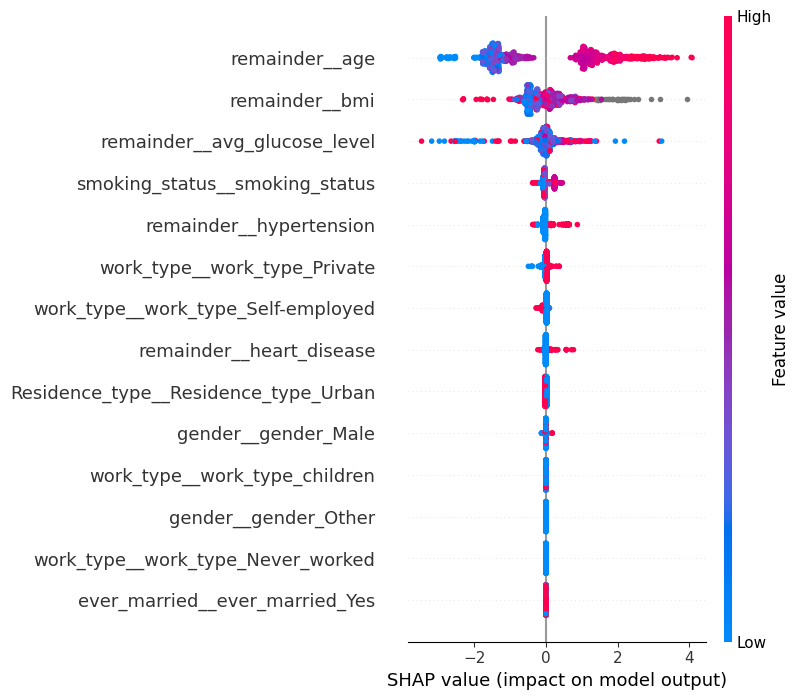

In [140]:
from ARISA_DSML.predict import predict
from catboost import CatBoostClassifier

params = joblib.load(model_params_path)
display(params)
from_file = CatBoostClassifier()
model = from_file.load_model(str(model_path))
preds_path = predict(model, df_test, params)